In [132]:
import io
import sklearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

In [133]:
df = pd.read_csv("iris.csv", header=0)
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [134]:
y = df.iloc[:, -1]
x = df.iloc[:,:-1]

print("Tamanho do Dataset Completo {} Amostras".format(len(x)))
print("Setosa: {} | Versicolor: {} | Virginica: {}".format(y.value_counts()[0],y.value_counts()[1],y.value_counts()[2]))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=20, shuffle=True)
print("")
print("Tamanho do Dataset Treino {} Amostras".format(len(x_train)))
print("Setosa: {} amostras | Versicolor: {} Amostras | Virginica: {} Amostras".format(y_train.value_counts()[0], y_train.value_counts()[1], y_train.value_counts()[2]))
print("")
print("Tamanho do Dataset Teste {} Amostras".format(len(x_test)))
print("Setosa: {} amostras | Versicolor: {} Amostras | Virginica: {} Amostras".format(y_test.value_counts()[0], y_test.value_counts()[1], y_test.value_counts()[2]))

Tamanho do Dataset Completo 150 Amostras
Setosa: 50 | Versicolor: 50 | Virginica: 50

Tamanho do Dataset Treino 120 Amostras
Setosa: 42 amostras | Versicolor: 39 Amostras | Virginica: 39 Amostras

Tamanho do Dataset Teste 30 Amostras
Setosa: 8 amostras | Versicolor: 11 Amostras | Virginica: 11 Amostras


In [135]:
from sklearn import svm

model = svm.LinearSVC(max_iter=100, random_state=21)
model.fit(x_train, y_train)

LinearSVC(max_iter=100, random_state=21)

In [136]:
y_pred = model.predict(x_test)
print(y_pred)
print(y_test)

[0 1 1 2 1 1 2 0 2 0 2 1 2 0 0 2 0 1 2 1 1 2 2 0 2 1 1 0 2 2]
47     0
73     1
74     1
129    2
67     1
89     1
143    2
21     0
108    2
12     0
147    2
76     1
119    2
35     0
28     0
122    2
13     0
58     1
114    2
57     1
50     1
149    2
111    2
20     0
72     1
81     1
98     1
34     0
104    2
133    2
Name: class, dtype: int64


Confusion Matrix : 


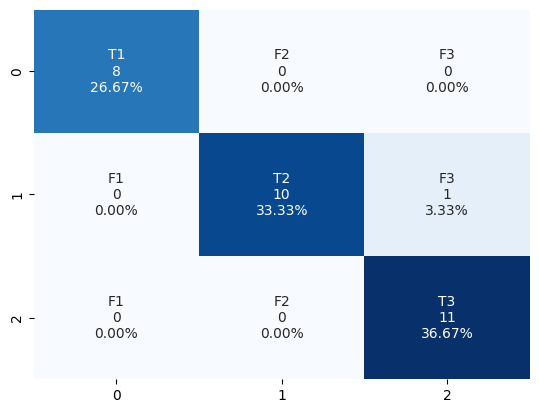

In [137]:
#Printando a Matriz

from sklearn.metrics import confusion_matrix
import seaborn

cm = confusion_matrix(y_test, y_pred)

# obter contagens de observações
t1, f2, f3, f1, t2, f3, f1, f2, t3 = cm.ravel()

# Visualização da Matriz de Confusão
group_names = ['T1','F2','F3','F1','T2','F3','F1','F2','T3']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
seaborn.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)

print("Confusion Matrix : ")

In [138]:
accuracy = (t1 + t2 + t3)/(t1 + f2 + f3 + f1 + t2 + f3 + f1 + f2 + t3)
print("Acurácia de {0:0.2f}%".format(accuracy*100))

Acurácia de 93.55%


In [139]:
precision1 = (t1)/(t1+f1+f1)
precision2 = (t2)/(t2+f2+f2)
precision3 = (t3)/(t3+f3+f3)
print("Precisão1 de {0:0.2f}%".format(precision1*100))
print("Precisão2 de {0:0.2f}%".format(precision2*100))
print("Precisão3 de {0:0.2f}%".format(precision3*100))

Precisão1 de 100.00%
Precisão2 de 100.00%
Precisão3 de 84.62%


In [140]:
recall1 = (t1)/(t1+f2+f3)
recall2 = (t2)/(t2+f1+f3)
recall3 = (t3)/(t3+f1+f2)
print("Recall1 de {0:0.2f}%".format(recall1*100))
print("Recall2 de {0:0.2f}%".format(recall2*100))
print("Recall3 de {0:0.2f}%".format(recall3*100))

Recall1 de 88.89%
Recall2 de 90.91%
Recall3 de 100.00%


In [141]:
f11 = (2*precision1*recall1)/(recall1+precision1)
f12 = (2*precision2*recall2)/(recall2+precision2)
f13 = (2*precision3*recall3)/(recall3+precision3)
print("F1-1 - Score de {0:0.2f}%".format(f11*100))
print("F1-2 - Score de {0:0.2f}%".format(f12*100))
print("F1-3 - Score de {0:0.2f}%".format(f13*100))

F1-1 - Score de 94.12%
F1-2 - Score de 95.24%
F1-3 - Score de 91.67%
